## Modulos

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import KernelPCA

## Funciones relevantes

In [88]:
def grafica(x,y,clf,titulo):
    X1,X2= np.meshgrid(np.arange(start=x[:,0].min()-1, stop= x[:,0].max()+1,step= .01),
                   np.arange(start=x[:,1].min()-1, stop= x[:,1].max()+1,step= .01))
    plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                alpha=.75,cmap=ListedColormap(('red','green','blue')))
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())

    for i,j in enumerate(np.unique(y_train)):
        plt.scatter(x[y==j,0],x[y==j,1],
                    c= ListedColormap(('red','green','blue'))(i),label=j)

    plt.title(titulo)
    plt.show()

## Cargar datos

In [2]:
data1= pd.read_csv("ConjuntoDeDatos1.csv")
data2= pd.read_csv("ConjuntoDeDatos2.csv")

In [3]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [58]:
data2["Gender"]=data2["Gender"].apply(lambda x: 1 if x=='Male' else 0)

In [59]:
data2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0


## Preproceasamiento de los datos

In [60]:
X= data1.iloc[:,0:13].values
y= data1.iloc[:,13].values
X2= data2.iloc[:,1:3].values
y2= data2.iloc[:,4].values

### Dividir datos

In [71]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size=.25, random_state=0)
x2_train,x2_test,y2_train,y2_test= train_test_split(X2,y2, test_size=.25, random_state=0)

### Escalamiento de los datos

In [72]:
sx= StandardScaler()
x_train= sx.fit_transform(x_train)
x_test= sx.fit_transform(x_test)
sx2= StandardScaler()
x2_train= sx2.fit_transform(x2_train)
x2_test= sx2.fit_transform(x2_test)

## PCA

In [75]:
pca= PCA(n_components=2)
x_train= pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [76]:
pca.explained_variance_ratio_

array([0.66548304, 0.33451696])

### Arbol de clasificacion

In [77]:
tree = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=0)

### Matriz de confusión

In [78]:
y_tree=tree.predict(x_test)
cm= confusion_matrix(y_test,y_tree)

In [79]:
cm

array([[16,  0,  0],
       [ 1, 18,  2],
       [ 0,  0,  8]])

### Visualización

/tmp/ipykernel_5933/3210782957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y==j,0],x[y==j,1],


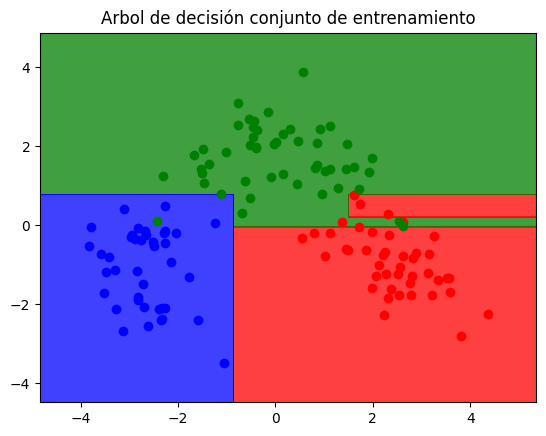

In [89]:
grafica(x_train,y_train,tree, "Arbol de decisión conjunto de entrenamiento")

/tmp/ipykernel_5933/3210782957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y==j,0],x[y==j,1],


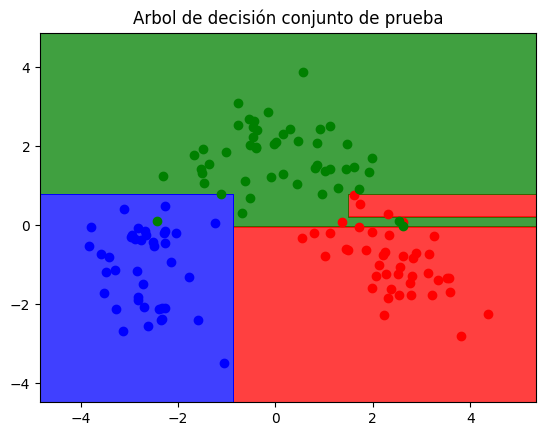

In [90]:
grafica(x_train,y_train,tree, "Arbol de decisión conjunto de prueba")

## LDA

In [ ]:
lda = LatentDirichletAllocation(n_components=2,random_state=0)
x_train= lda.fit_transform(x_train)
x_test= lda.transform(x_test)

## Kernel PCA

In [94]:
transformer = KernelPCA(n_components=2, kernel='rbf')
x2_train= transformer.fit_transform(x2_train)
x2_test= transformer.transform(x2_test)

### Regresion Logistica

In [95]:
regLog= LogisticRegression(random_state=0)
regLog.fit(x2_train, y2_train)

LogisticRegression(random_state=0)

In [96]:
y_log= regLog.predict(x2_test)
cm=confusion_matrix(y2_test,y_log)

In [97]:
cm

array([[60,  8],
       [ 7, 25]])

/tmp/ipykernel_5933/3210782957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y==j,0],x[y==j,1],


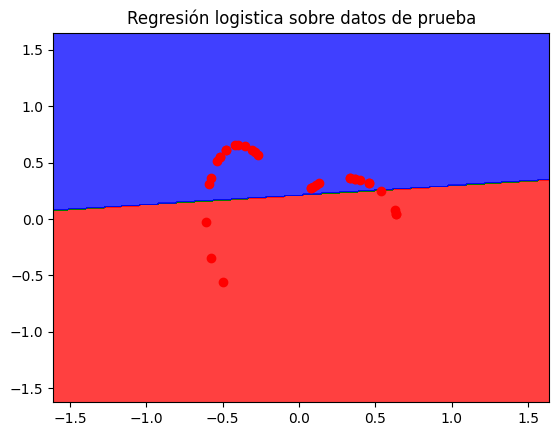

In [100]:
grafica(x2_test,y2_test,regLog,"Regresión logistica sobre datos de prueba")

### Arboles de clasificación

In [86]:
tree2 = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
tree2.fit(x2_train,y2_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=0)